## Import all packages and data

In [1]:
# Standard Packages
import pandas as pd
import numpy as np
import markdown

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures


# Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
hd = pd.read_csv("/Users/eli/Desktop/Kings-County-Real-Estate-analysis-NAEG/Nadya/data/kc_house_data.csv")
f = open('/Users/eli/Desktop/Kings-County-Real-Estate-analysis-NAEG/Nadya/data/column_names.md', 'r')
desc=markdown.markdown( f.read() )
hd

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [3]:
hd.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [78]:
hd['waterfront'].value_counts()

NO     28654
YES      510
Name: waterfront, dtype: int64

In [4]:
hd.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [5]:
hd[hd['sqft_living'] == 3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
14977,1549500215,12/17/2021,1803000.0,4,4.0,3,326701,2.0,NO,NO,...,PRIVATE,2,1,1,0,2021,0,"31072 Northeast 165th Street, Duvall, Washingt...",47.74529,-121.92362


In [6]:
hd.drop(index = 14977, axis = 0, inplace = True)

In [7]:
# find and drop sales records with no bedrooms or no bathrooms
nobed_nobath = hd.loc[(hd['bedrooms'] == 0) | (hd['bathrooms'] == 0)]
hd.drop(index = nobed_nobath.index, inplace = True, axis = 0)

In [8]:
#add zip column for zipcodes
hd["zip"] = hd.address.str[-20:-15]

#remove data that is outside of King County
zips=[98052,98115,98103,98092,98042,98023,98105,98003,98034,98118,98133,98058,98125,98031,98122,98033,98006,98032,98030,98004,98001,98059,98117,98056,98198,98168,98155,98027,98109,98002,98038,98144,98146,98074,98119,98007,98040,98029,98107,98011,98108,98072,98106,98178,98116,98112,98008,98053,98028,98126,98188,98102,98055,98075,98177,98022,98166,98199,98005,98121,98136,98045,98057,98019,98104,98077,98101,98065,98148,98070,98014,98354,98024,98051,98010,98047,98251,98134,98039,98195,98158,98068,98256,98288,98050,98132,98171,98184,98054,98009,98013,98015,98025,98035,98041,98062,98064,98063,98071,98073,98083,98089,98093,98111,98113,98114,98124,98127,98131,98129,98139,98138,98141,98145,98151,98154,98160,98164,98161,98165,98170,98174,98175,98181,98185,98190,98194,98191,98224,98471,98481]
zips_strings = [str(i) for i in zips]
zips = zips_strings
non_wa_zips = hd.loc[~hd["zip"].isin(zips)]
hd.drop(index = non_wa_zips.index, inplace = True, axis = 0)

#convert zip category to integers
hd["zip"] = hd["zip"].astype(int)

#remove duplicate rows
hd = hd.drop_duplicates(subset=["id"])

In [9]:
#remove id column
hd = hd.drop(columns=["id"])

#add columns for year sold and years old
hd["year_sold"] = hd.date.str[-4:].astype(int)
hd["years_old"] = 2023-hd["yr_built"]

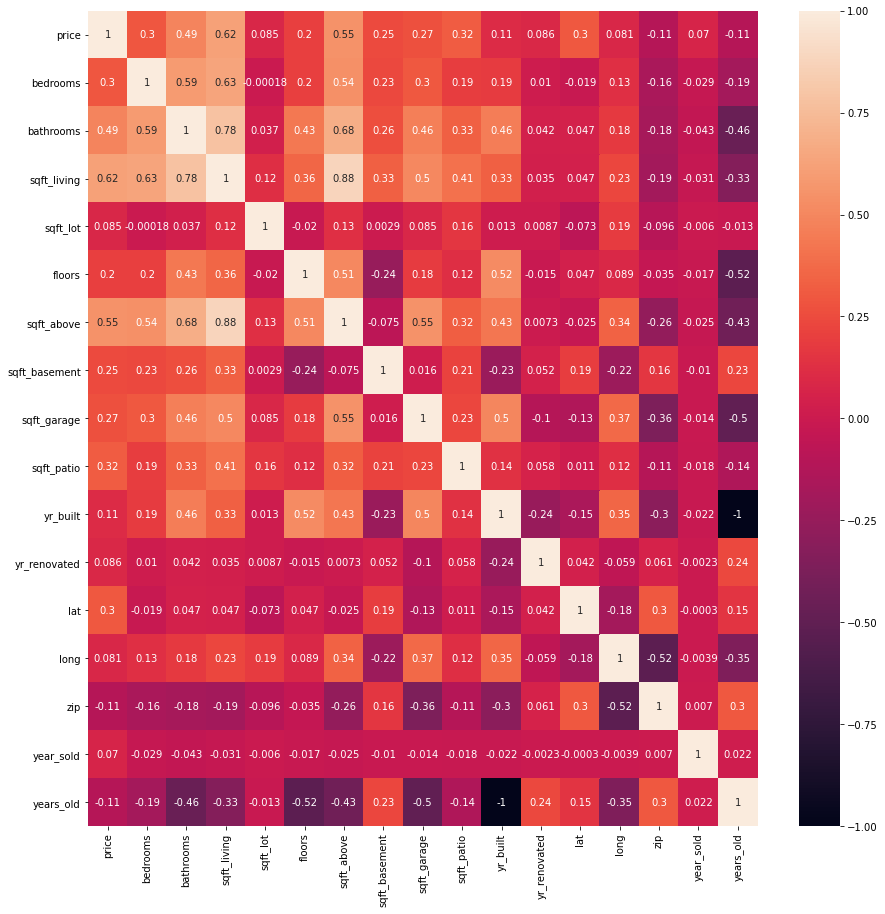

In [10]:
#plot the heatmap to determine correlations
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(hd.corr(), annot=True);

In [11]:
#list correlations
price_corrs = hd.corr()['price'].map(abs).sort_values(ascending=False)
price_corrs

price            1.000000
sqft_living      0.620117
sqft_above       0.549083
bathrooms        0.491485
sqft_patio       0.318593
lat              0.298873
bedrooms         0.295277
sqft_garage      0.269111
sqft_basement    0.247288
floors           0.201767
yr_built         0.107067
years_old        0.107067
zip              0.106358
yr_renovated     0.085973
sqft_lot         0.084831
long             0.081021
year_sold        0.070306
Name: price, dtype: float64

## Simple Linear Regression - Baseline Model with Train-Test Split

In [12]:
# define variables for simple linear regression
y = hd['price']
X = hd.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# double check train-test split 
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 21873 rows and 26 columns
y_train is a Series with 21873 values


In [74]:
# select our best correlated predictor, as our X Train
baseline_X_train = X_train[['sqft_living']]

# Do the same for X Test
baseline_X_test = X_test[['sqft_living']]

# instantiate the baseline model
baseline_model = LinearRegression()

# Fit our train model
baseline_train_model = sm.OLS(y_train, sm.add_constant(baseline_X_train)).fit()
baseline_train_model.summary()

# Fit our test model
baseline_test_model = sm.OLS(y_test, sm.add_constant(baseline_X_test)).fit()
baseline_test_model.summary()

# Get our R2 score
print(f'Baseline Training R2: {baseline_model.rsquared}.')

Baseline Training R2: 0.40510979658658686.


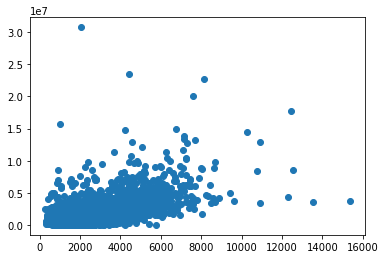

In [14]:
plt.scatter(x=hd["sqft_living"], y=hd["price"]);

## Polynomial Model

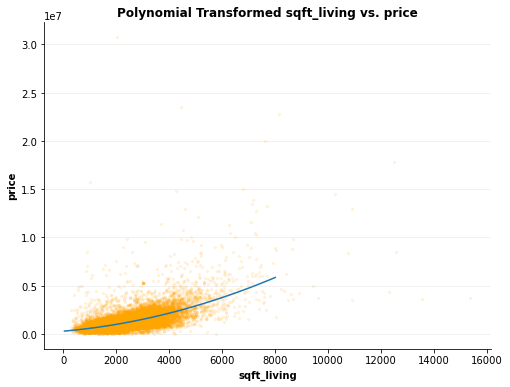

In [15]:
# fit and transform the X_train sqft_living column to a poly of 2
poly2 = PolynomialFeatures(2)
poly_sqft = poly2.fit_transform(X_train[['sqft_living']])

# instantiate a PolynomialFeatures and fit/transfrom to X_poly
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(baseline_X_train)

# fit X_poly to Linear Regression model 
reg_poly = LinearRegression().fit(X_poly, y_train)

# create line parameters 
X_linspace = pd.DataFrame(np.linspace(50, 8000, 50), columns= ['sqft_living'])

# create poly line X and Y values
X_linspace_fin = poly.fit_transform(X_linspace)
y_poly_pred = reg_poly.predict(X_linspace_fin)

# set up fig
fig, ax = plt.subplots(figsize=(8, 6))

# plot polynomial regression line against the data
plt.scatter(hd['sqft_living'], hd['price'], 
            s = 5, alpha = 0.1, 
            color='orange')

plt.plot(X_linspace, y_poly_pred)
plt.xlabel('sqft_living', weight = 'bold')
plt.ylabel('price', weight = 'bold')
ax.set_title('Polynomial Transformed sqft_living vs. price', weight = 'bold');

# removes top and right side axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.show();

In [16]:
# instantiate a poly baseline model
poly_baseline_model = LinearRegression()

# Fit our poly model
poly_baseline_model.fit(X_poly, y_train)
poly_baseline_model.score(X_poly, y_train)

0.431359547772741

## Add School Data

Data from https://data.wa.gov/education/Report-Card-Assessment-Data-2021-22-School-Year/v928-8kke and https://eds.ospi.k12.wa.us/directoryeds.aspx

In [17]:
#Import school data
rc = pd.read_csv("/Users/eli/Desktop/Kings-County-Real-Estate-analysis-NAEG/Nadya/data/Report_Card_Assessment_Data_2021-22_School_Year.csv")
addresses=pd.read_csv("/Users/eli/Desktop/Kings-County-Real-Estate-analysis-NAEG/Nadya/data/Washington_School_Directory_20230214.csv")

#Clean up Addresses dataframe
addresses["ZipCode"] = addresses["ZipCode"].apply(lambda x: x[:5])
non_waaddresses = addresses[~addresses['ZipCode'].isin(zips)]
addresses.drop(index = non_waaddresses.index, inplace = True, axis = 0)
addresses=addresses[["SchoolName", "ZipCode"]]

#Clean up Report Card dataframe

rc = rc[["OrganizationLevel", "County", "SchoolName", "GradeLevel", "TestSubject", "PercentMetStandard"]]
rc = rc[rc["County"] == "King"].drop(columns=["County"])
rc = rc[rc["OrganizationLevel"] == "School"].drop(columns=["OrganizationLevel"])
rc = rc[rc["GradeLevel"] == "All Grades"].drop(columns=["GradeLevel"])

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [18]:
#Standardize data under percent met standard column
rc["PercentMetStandard"]=rc["PercentMetStandard"].replace("Suppressed: N<10", "0.0%")
rc["PercentMetStandard"]=rc["PercentMetStandard"].replace("No Students", "0.0%")
rc["PercentMetStandard"]=rc["PercentMetStandard"].apply(lambda x: x.strip("%"))
rc["PercentMetStandard"]=rc["PercentMetStandard"].apply(lambda x: x.strip(">"))
rc["PercentMetStandard"]=rc["PercentMetStandard"].apply(lambda x: x.strip("<"))
rc["PercentMetStandard"]=rc["PercentMetStandard"].astype(float)

#Average test scores and create a ratings column
rc = rc.groupby(["SchoolName"]).aggregate({"PercentMetStandard":"mean"}).sort_values(by=["SchoolName"]).reset_index()
rc["rating"] = rc["PercentMetStandard"]/10

In [19]:
#Join dataframes and remove excess columns
schools = rc.merge(addresses, left_on="SchoolName", right_on="SchoolName")
schools = schools[["SchoolName", "rating", "ZipCode"]]
schools["ZipCode"] = schools["ZipCode"].astype(int)

In [20]:
schools_dict = dict(zip(schools.ZipCode, round(schools.rating, 1)))

In [21]:
X_train['avg_school_quality'] = X_train['zip'].map(schools_dict)

<ipython-input-21-a4b485f5a02c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['avg_school_quality'] = X_train['zip'].map(schools_dict)


In [22]:
X_train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,sqft_patio,yr_built,yr_renovated,address,lat,long,zip,year_sold,years_old,avg_school_quality
24120,8/26/2021,3,2.0,1010,7598,1.0,NO,NO,NO,NONE,...,0,1947,0,"5965 21st Avenue Southwest, Seattle, Washingto...",47.548270,-122.360050,98106,2021,76,1.3
8411,3/10/2022,3,2.5,1300,825,2.0,NO,NO,NO,NONE,...,0,2008,0,"1127A 18th Ave, Seattle, Washington 98122, Uni...",47.611760,-122.309000,98122,2022,15,0.5
20885,6/24/2021,3,2.0,1950,7070,1.0,NO,NO,NO,NONE,...,170,1976,0,"12534 Southeast 277th Place, Kent, Washington ...",47.353255,-122.174140,98030,2021,47,1.5
11917,4/27/2022,3,2.0,1770,7544,1.0,NO,NO,NO,NONE,...,80,1977,0,"8902 Northeast 144th Street, Kirkland, Washing...",47.731640,-122.221600,98034,2022,46,0.6
12517,1/3/2022,5,3.5,2690,7200,2.0,NO,NO,NO,GOOD,...,400,1978,0,"14508 37th Avenue Northeast, Lake Forest Park,...",47.734060,-122.288075,98155,2022,45,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22319,4/20/2022,3,1.5,1400,8863,1.0,NO,NO,NO,NONE,...,60,1990,0,"313 Johnson Street, Enumclaw, Washington 98022...",47.194440,-121.999240,98022,2022,33,2.0
5554,5/18/2022,4,2.5,2170,6408,1.0,NO,NO,NO,NONE,...,170,1981,0,"14008 81st Avenue Northeast, Kirkland, Washing...",47.726310,-122.233155,98034,2022,42,0.6
883,4/25/2022,3,2.5,1740,4277,2.0,NO,NO,NO,NONE,...,20,1992,0,"25760 Southeast 35th Place, Sammamish, Washing...",47.577610,-121.995820,98029,2022,31,5.1
16321,7/23/2021,4,3.0,2120,9046,1.0,NO,NO,NO,NONE,...,0,1993,0,"1917 South 369th Street, Federal Way, Washingt...",47.270015,-122.309395,98003,2021,30,2.0


In [23]:
scale_mapper1 = {"NONE":0, "FAIR": 1, "AVERAGE":2, "GOOD":3, "EXCELLENT":4}
X_train["view"] = X_train["view"].replace(scale_mapper1)

scale_mapper2 = {"Poor":0, "Fair": 1, "Average":2, "Good":3, "Very Good":4}
X_train["condition"] = X_train["condition"].replace(scale_mapper2)

scale_mapper3 = {"1 Cabin":1, "2 Substandard": 2, "3 Poor":3, "4 Low":4, "5 Fair":5, 
               "6 Low Average":6, "7 Average": 7, "8 Good":8, "9 Better":9, "10 Very Good":10,
               "11 Excellent": 11, "12 Luxury":12, "13 Mansion":13 }
X_train["grade"] = X_train["grade"].replace(scale_mapper3)

<ipython-input-23-7dad008bcee4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["view"] = X_train["view"].replace(scale_mapper1)
<ipython-input-23-7dad008bcee4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["condition"] = X_train["condition"].replace(scale_mapper2)
<ipython-input-23-7dad008bcee4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [24]:
X_train['renovated'] = np.where(X_train['yr_renovated'] > 0, 1, 0)
X_train.drop('yr_renovated', axis = 1, inplace = True)
X_train['renovated'].value_counts()

<ipython-input-24-e970d81e40db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['renovated'] = np.where(X_train['yr_renovated'] > 0, 1, 0)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


0    20837
1     1036
Name: renovated, dtype: int64

In [25]:
X_train = pd.get_dummies(X_train, columns = ['waterfront', 'greenbelt', 'nuisance', 'renovated', "heat_source", "sewer_system"], drop_first = True)

In [26]:
X_train = X_train.drop(columns=["address"])

In [27]:
X_train.loc[X_train['avg_school_quality'].isna()] = X_train['avg_school_quality'].mean()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21873 entries, 24120 to 24470
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   date                             21873 non-null  object 
 1   bedrooms                         21873 non-null  float64
 2   bathrooms                        21873 non-null  float64
 3   sqft_living                      21873 non-null  float64
 4   sqft_lot                         21873 non-null  float64
 5   floors                           21873 non-null  float64
 6   view                             21873 non-null  float64
 7   condition                        21873 non-null  float64
 8   grade                            21873 non-null  float64
 9   sqft_above                       21873 non-null  float64
 10  sqft_basement                    21873 non-null  float64
 11  sqft_garage                      21873 non-null  float64
 12  sqft_patio    

# All Variable Model

In [28]:
all_variable_X = X_train
all_variable_X = all_variable_X.drop(columns=["date", "year_sold"])
all_variable_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21873 entries, 24120 to 24470
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   bedrooms                         21873 non-null  float64
 1   bathrooms                        21873 non-null  float64
 2   sqft_living                      21873 non-null  float64
 3   sqft_lot                         21873 non-null  float64
 4   floors                           21873 non-null  float64
 5   view                             21873 non-null  float64
 6   condition                        21873 non-null  float64
 7   grade                            21873 non-null  float64
 8   sqft_above                       21873 non-null  float64
 9   sqft_basement                    21873 non-null  float64
 10  sqft_garage                      21873 non-null  float64
 11  sqft_patio                       21873 non-null  float64
 12  yr_built      

In [29]:
all_variable_model = sm.OLS(y_train, sm.add_constant(all_variable_X)).fit()
all_variable_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     1051.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:05:42   Log-Likelihood:            -3.2076e+05
No. Observations:               21873   AIC:                         6.416e+05
Df Residuals:                   21842   BIC:                         6.418e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -6.639e+06   1.46e+06     -4.555      0.000    -9.5e+06   -3.78e+06
bedrooms                        -8.734e+04   5415.389    -16.127      0.000    -9.8e+04   -7.67e+04
bathrooms                        6.846e+04   7994.291      8.563      0.000    5.28e+04    8.41e+04
sqft_living                       173.4670     17.933      9.673      0.000     138.317     208.618
sqft_lot                            0.3557      0.067      5.278      0.000       0.224       0.488
floors                          -1.367e+05   1.02e+04    -13.388      0.000   -1.57e+05   -1.17e+05
view                              9.59e+04   5327.829     17.999      0.000    8.55e+04    1.06e+05
condition                        4.882e+04   6137.986      7.953      0.000    3.68e+04    6.08e+04
grade                            1.779e+05   5892.793     30.194      0.000    1.66e+05    1.89e+05
sqft_above                        286.9576     18.241     15.732      0.000     251.205     322.710
sqft_basement                      76.4811     13.518      5.658      0.000      49.986     102.976
sqft_garage                      -124.5320     19.432     -6.409      0.000    -162.621     -86.443
sqft_patio                        109.7870     18.083      6.071      0.000      74.343     145.231
yr_built                         3.334e+04   4226.143      7.889      0.000    2.51e+04    4.16e+04
lat                              1.401e+06   3.16e+04     44.358      0.000    1.34e+06    1.46e+06
long                            -2.316e+05   3.57e+04     -6.480      0.000   -3.02e+05   -1.62e+05
zip                             -1601.6631     93.041    -17.215      0.000   -1784.031   -1419.295
years_old                        3.576e+04   4268.141      8.379      0.000    2.74e+04    4.41e+04
avg_school_quality               4.793e+04   2589.715     18.507      0.000    4.29e+04     5.3e+04
waterfront_YES                   9.335e+05   3.25e+04     28.691      0.000     8.7e+05    9.97e+05
greenbelt_YES                    3072.7925   2.46e+04      0.125      0.901   -4.52e+04    5.13e+04
nuisance_YES                     1807.0693   1.04e+04      0.174      0.862   -1.85e+04    2.22e+04
renovated_1                       7.34e+04   1.96e+04      3.742      0.000    3.49e+04    1.12e+05
heat_source_Electricity/Solar    -9.51e+04   9.49e+04     -1.002      0.317   -2.81e+05     9.1e+04
heat_source_Gas                 -1.388e+04   1.04e+04     -1.331      0.183   -3.43e+04    6561.287
heat_source_Gas/Solar            1.666e+05   6.66e+04      2.502      0.012    3.61e+04    2.97e+05
heat_source_Oil                 -3.503e+04   1.59e+04     -2.208      0.027   -6.61e+04   -3935.530
heat_source_Oil/Solar           -7.628e+04   2.83e+05     -0.269      0.788   -6.31

#add requirements for our stakeholder
hd = hd.loc[(hd["bedrooms"] > 1) & (hd["bedrooms"]<=5)]
hd = hd.loc[hd["price"]<=1300000]
hd = hd.drop(columns=["date"])

# Recursive Feature Elimination Model

In [30]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select = 5)

In [31]:
select.fit(X = all_variable_X, y = y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [32]:
select.ranking_

array([15,  5, 20, 26,  6,  7, 11,  1, 21, 24, 23, 22, 17,  1,  1, 19, 18,
       12,  1, 25, 16,  3, 10, 14,  2,  9,  1,  4, 13,  8])

In [33]:
all_variable_X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_garage',
       'sqft_patio', 'yr_built', 'lat', 'long', 'zip', 'years_old',
       'avg_school_quality', 'waterfront_YES', 'greenbelt_YES', 'nuisance_YES',
       'renovated_1', 'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other', 'sewer_system_PRIVATE RESTRICTED',
       'sewer_system_PUBLIC'],
      dtype='object')

In [34]:
pd.DataFrame(data=select.ranking_, index=all_variable_X.columns)

,0
bedrooms,15
bathrooms,5
sqft_living,20
sqft_lot,26
floors,6
view,7
condition,11
grade,1
sqft_above,21
sqft_basement,24


In [35]:
rfe_X = all_variable_X[['bathrooms', 'floors', 'view', 'grade', 'waterfront_YES']]
rfe_model = sm.OLS(y_train, sm.add_constant(rfe_X)).fit()
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     3410.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:05:43   Log-Likelihood:            -3.2423e+05
No. Observations:               21873   AIC:                         6.485e+05
Df Residuals:                   21867   BIC:                         6.485e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.942e+06   3.17e+04    -61.182      0.000      -2e+06   -1.88e+06
bathrooms       2.063e+05   6779.697     30.429      0.000    1.93e+05     2.2e+05
floors         -1.887e+05   9546.534    -19.764      0.000   -2.07e+05    -1.7e+05
view            1.451e+05   5834.483     24.862      0.000    1.34e+05    1.56e+05
grade           3.665e+05   5359.315     68.383      0.000    3.56e+05    3.77e+05
waterfront_YES  7.145e+05   3.09e+04     23.116      0.000    6.54e+05    7.75e+05
==============================================================================
Omnibus:                    26342.480   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10322910.633
Skew:                           6.031   Prob(JB):                         0.00
Kurtosis:                     108.741   Cond. No.                         62.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log Transformation

In [36]:
all_variable_X['view'].value_counts()

0.000000    19200
2.000000     1427
3.000000      639
4.000000      421
1.000000      168
3.201025       18
Name: view, dtype: int64

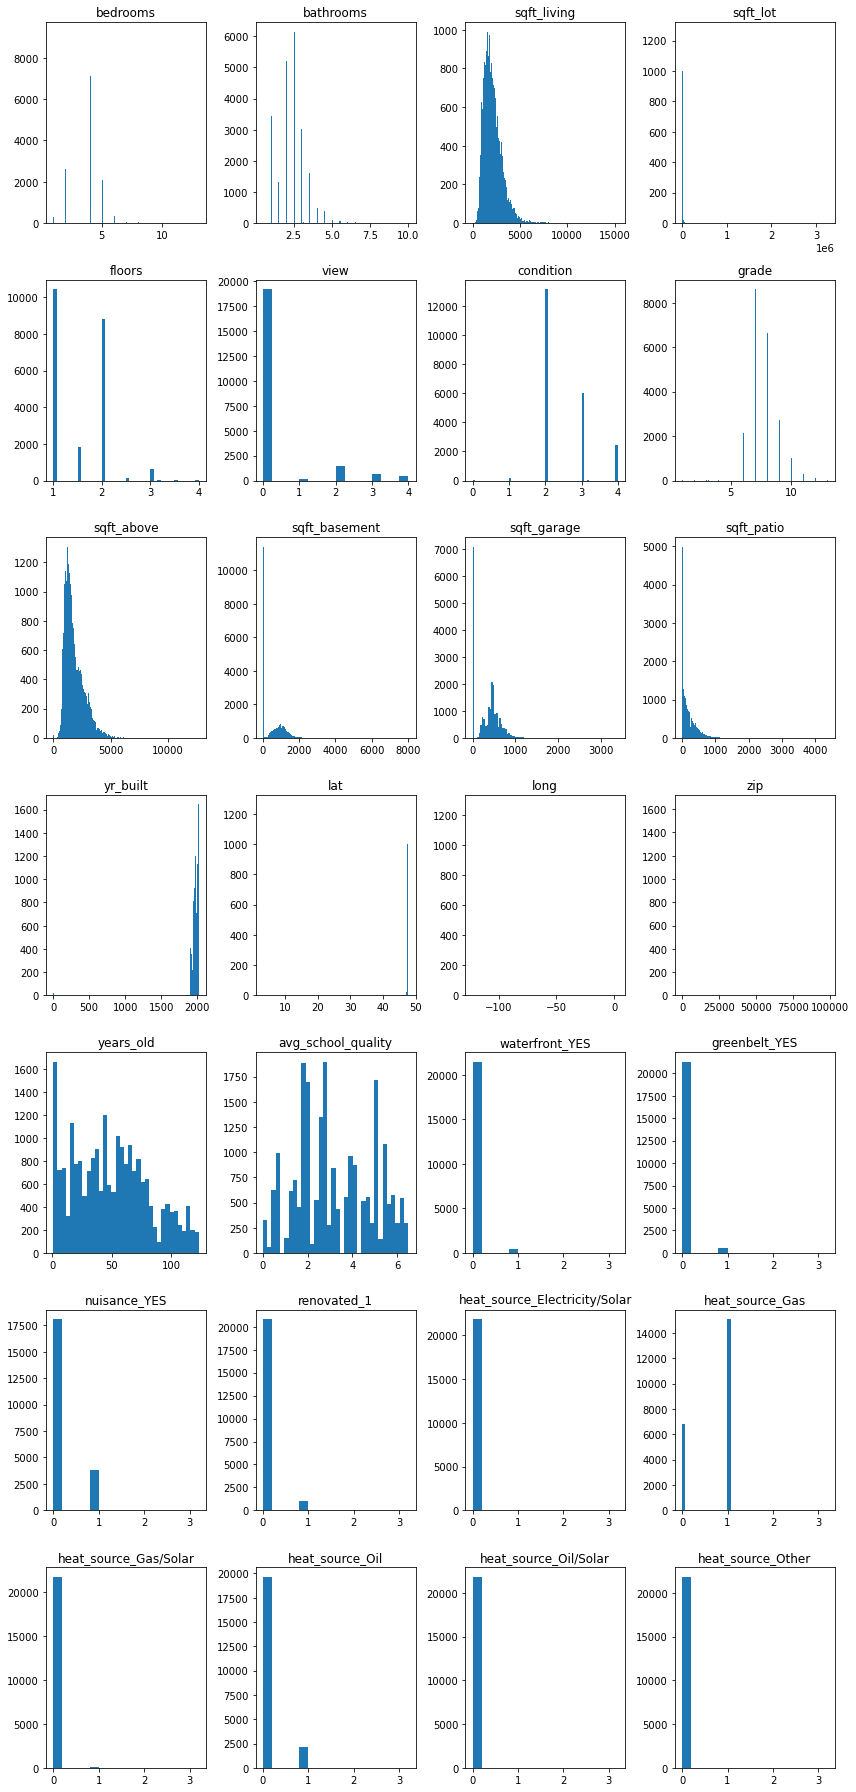

In [37]:
# set up figure for predictor variables in all_variable_X
fig, axes = plt.subplots(nrows=(all_variable_X.shape[1] // 4), ncols=4, figsize=(12,25))

# for each col in X_third, plot distribution
for col, ax in zip(all_variable_X, axes.flatten()):
    ax.hist(all_variable_X[col], bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

In [46]:
#selecting variables for log
log_variables = ['sqft_living','sqft_above', 'bathrooms']

# assign to X_cont
X_logs = all_variable_X[log_variables]

In [47]:
X_logs

,sqft_living,sqft_above,bathrooms
24120,1010.0,1010.0,2.0
8411,1300.0,880.0,2.5
20885,1950.0,1080.0,2.0
11917,1770.0,1290.0,2.0
12517,2690.0,1720.0,3.5
...,...,...,...
22319,1400.0,1400.0,1.5
5554,2170.0,1440.0,2.5
883,1740.0,1740.0,2.5
16321,2120.0,1510.0,3.0


In [48]:
X_logs.describe()

,sqft_living,sqft_above,bathrooms
count,21873.000000,21873.000000,21873.000000
mean,2131.292809,1828.396910,2.334139
std,982.504208,887.086457,0.893411
min,3.201025,3.201025,0.500000
25%,1440.000000,1190.000000,2.000000
50%,1950.000000,1580.000000,2.500000
75%,2640.000000,2300.000000,3.000000
max,15360.000000,12660.000000,10.000000


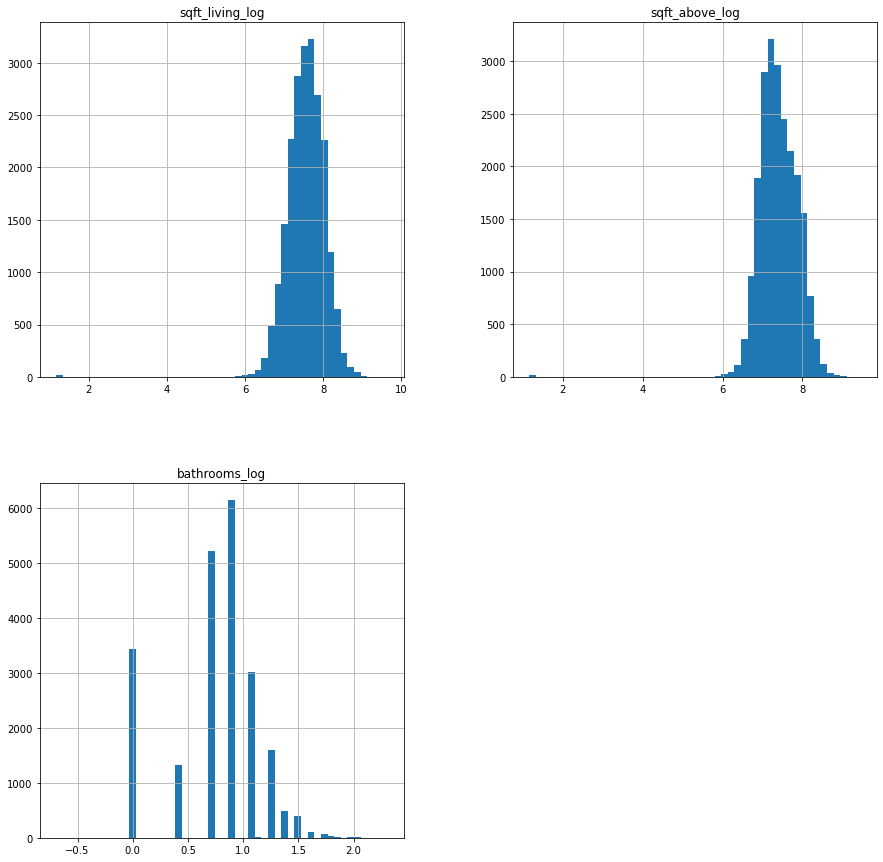

In [49]:
#log transformation
log_columns = [f'{column}_log' for column in X_logs.columns]
cont_log = np.log(X_logs)
cont_log.columns = log_columns
cont_log.hist(figsize=(15, 15), bins=50)
fig.tight_layout();

In [50]:
cont_log

,sqft_living_log,sqft_above_log,bathrooms_log
24120,6.917706,6.917706,0.693147
8411,7.170120,6.779922,0.916291
20885,7.575585,6.984716,0.693147
11917,7.478735,7.162397,0.693147
12517,7.897296,7.450080,1.252763
...,...,...,...
22319,7.244228,7.244228,0.405465
5554,7.682482,7.272398,0.916291
883,7.461640,7.461640,0.916291
16321,7.659171,7.319865,1.098612


In [53]:
log_transformed = cont_log.join(all_variable_X).drop(columns = ["sqft_living", "sqft_above", "sqft_lot", 'bathrooms',
                                                                "yr_built", "sqft_basement", "sqft_garage", "sqft_patio"])
log_transformed

,sqft_living_log,sqft_above_log,bathrooms_log,bedrooms,floors,view,condition,grade,lat,long,...,nuisance_YES,renovated_1,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC
24120,6.917706,6.917706,0.693147,3.0,1.0,0.0,4.0,6.0,47.548270,-122.360050,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8411,7.170120,6.779922,0.916291,3.0,2.0,0.0,2.0,8.0,47.611760,-122.309000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20885,7.575585,6.984716,0.693147,3.0,1.0,0.0,3.0,7.0,47.353255,-122.174140,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11917,7.478735,7.162397,0.693147,3.0,1.0,0.0,2.0,8.0,47.731640,-122.221600,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
12517,7.897296,7.450080,1.252763,5.0,2.0,3.0,2.0,9.0,47.734060,-122.288075,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22319,7.244228,7.244228,0.405465,3.0,1.0,0.0,3.0,6.0,47.194440,-121.999240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5554,7.682482,7.272398,0.916291,4.0,1.0,0.0,2.0,8.0,47.726310,-122.233155,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
883,7.461640,7.461640,0.916291,3.0,2.0,0.0,3.0,8.0,47.577610,-121.995820,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
16321,7.659171,7.319865,1.098612,4.0,1.0,0.0,2.0,8.0,47.270015,-122.309395,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
log_y = np.log(y_train)

In [55]:
log_model = sm.OLS(log_y, sm.add_constant(log_transformed)).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1571.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:09:00   Log-Likelihood:                -7962.4
No. Observations:               21873   AIC:                         1.598e+04
Df Residuals:                   21847   BIC:                         1.618e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               5.6348      0.877      6.426      0.000       3.916       7.354
sqft_living_log                     0.2590      0.016     16.686      0.000       0.229       0.289
sqft_above_log                      0.1608      0.013     12.260      0.000       0.135       0.187
bathrooms_log                       0.0780      0.011      7.387      0.000       0.057       0.099
bedrooms                           -0.0071      0.003     -2.061      0.039      -0.014      -0.000
floors                             -0.0181      0.006     -3.018      0.003      -0.030      -0.006
view                                0.0739      0.003     23.046      0.000       0.068       0.080
condition                           0.0543      0.004     14.589      0.000       0.047       0.062
grade                               0.1523      0.003     43.879      0.000       0.146       0.159
lat                                 1.4236      0.019     73.704      0.000       1.386       1.461
long                                0.0767      0.022      3.545      0.000       0.034       0.119
zip                                -0.0006   3.09e-05    -18.136      0.000      -0.001      -0.000
years_old                           0.0018      0.000     15.710      0.000       0.002       0.002
avg_school_quality                  0.0450      0.002     28.863      0.000       0.042       0.048
waterfront_YES                      0.2727      0.020     13.659      0.000       0.234       0.312
greenbelt_YES                       0.0761      0.015      5.041      0.000       0.047       0.106
nuisance_YES                       -0.0247      0.006     -3.876      0.000      -0.037      -0.012
renovated_1                         0.0528      0.012      4.386      0.000       0.029       0.076
heat_source_Electricity/Solar      -0.2531      0.058     -4.332      0.000      -0.368      -0.139
heat_source_Gas                     0.0210      0.006      3.292      0.001       0.008       0.033
heat_source_Gas/Solar               0.0959      0.041      2.340      0.019       0.016       0.176
heat_source_Oil                    -0.0050      0.010     -0.515      0.607      -0.024       0.014
heat_source_Oil/Solar              -0.0238      0.173     -0.137      0.891      -0.363       0.316
heat_source_Other                   0.1335      0.093      1.431      0.152      -0.049       0.316
sewer_system_PRIVATE RESTRICTED     0.0124      0.174      0.071      0.943      -0.328       0.352
sewer_system_PUBLIC                 0.0243      0.007      3.319      0.001       0.010       0.039
==============================================================================
Omnibus:                     9819.521   Durbin-Watson:                   1.970
Prob(Omnibus):           

## One Hot Encode Zip Codes

In [56]:
log_transformed_zips = pd.get_dummies(log_transformed, columns = ['zip'], drop_first = True)
log_transformed_zips.columns

Index(['sqft_living_log', 'sqft_above_log', 'bathrooms_log', 'bedrooms',
       'floors', 'view', 'condition', 'grade', 'lat', 'long', 'years_old',
       'avg_school_quality', 'waterfront_YES', 'greenbelt_YES', 'nuisance_YES',
       'renovated_1', 'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other', 'sewer_system_PRIVATE RESTRICTED',
       'sewer_system_PUBLIC', 'zip_98001.0', 'zip_98002.0', 'zip_98003.0',
       'zip_98004.0', 'zip_98005.0', 'zip_98006.0', 'zip_98007.0',
       'zip_98008.0', 'zip_98010.0', 'zip_98011.0', 'zip_98014.0',
       'zip_98019.0', 'zip_98022.0', 'zip_98023.0', 'zip_98024.0',
       'zip_98027.0', 'zip_98028.0', 'zip_98029.0', 'zip_98030.0',
       'zip_98031.0', 'zip_98032.0', 'zip_98033.0', 'zip_98034.0',
       'zip_98038.0', 'zip_98039.0', 'zip_98040.0', 'zip_98042.0',
       'zip_98045.0', 'zip_98047.0', 'zip_98051.0', 'zip_98052.0',
       'zip_980

In [57]:
log_zips_model = sm.OLS(log_y, sm.add_constant(log_transformed_zips)).fit()
log_zips_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     551.6
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:09:06   Log-Likelihood:                -5648.6
No. Observations:               21873   AIC:                         1.149e+04
Df Residuals:                   21775   BIC:                         1.228e+04
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               8.8834      0.976      9.105      0.000       6.971      10.796
sqft_living_log                     0.2472      0.014     17.487      0.000       0.219       0.275
sqft_above_log                      0.2355      0.013     18.411      0.000       0.210       0.261
bathrooms_log                       0.0531      0.010      5.539      0.000       0.034       0.072
bedrooms                           -0.0029      0.003     -0.929      0.353      -0.009       0.003
floors                             -0.0546      0.006     -8.858      0.000      -0.067      -0.043
view                                0.0651      0.003     21.941      0.000       0.059       0.071
condition                           0.0563      0.003     16.495      0.000       0.050       0.063
grade                               0.0971      0.003     28.912      0.000       0.091       0.104
lat                                 0.6952      0.126      5.534      0.000       0.449       0.942
long                               -0.2328      0.111     -2.097      0.036      -0.450      -0.015
years_old                           0.0002      0.000      2.119      0.034    1.87e-05       0.000
avg_school_quality                  0.0499      0.040      1.235      0.217      -0.029       0.129
waterfront_YES                      0.2894      0.018     15.832      0.000       0.254       0.325
greenbelt_YES                       0.0583      0.014      4.165      0.000       0.031       0.086
nuisance_YES                       -0.0441      0.006     -7.561      0.000      -0.056      -0.033
renovated_1                         0.0551      0.011      5.052      0.000       0.034       0.076
heat_source_Electricity/Solar      -0.2510      0.053     -4.745      0.000      -0.355      -0.147
heat_source_Gas                     0.0121      0.006      2.077      0.038       0.001       0.024
heat_source_Gas/Solar               0.0668      0.037      1.802      0.071      -0.006       0.139
heat_source_Oil                    -0.0029      0.009     -0.329      0.742      -0.020       0.014
heat_source_Oil/Solar               0.1507      0.157      0.958      0.338      -0.158       0.459
heat_source_Other                   0.1987      0.084      2.354      0.019       0.033       0.364
sewer_system_PRIVATE RESTRICTED    -0.0305      0.158     -0.193      0.847      -0.340       0.279
sewer_system_PUBLIC                -0.0226      0.008     -2.974      0.003      -0.038      -0.008
zip_98001.0                       -61.4421     14.573     -4.216      0.000     -90.005     -32.879
zip_98002.0                       -61.5553     14.521     -4.239      0.000     -90.018     -33.093
zip_98003.0                       -61.5700     14.524     -4.239      0.000     -90

In [58]:
zips_ohe = pd.get_dummies(log_transformed['zip'], drop_first = True)
zips_school = zips_ohe.mul(log_transformed_zips['avg_school_quality'], axis = 0)

In [64]:
zips_school_interaction = pd.merge(zips_school, 
                                   log_transformed_zips[['sqft_living_log', 'sqft_above_log',
                                                         'years_old', 'bathrooms_log',
                                                         'bedrooms', 'floors', 'view',
                                                         'condition', 'grade','waterfront_YES',
                                                         'greenbelt_YES', 'nuisance_YES', 'renovated_1']], 
                                   how = 'inner', left_on = zips_school.index, right_on = log_transformed_zips.index)
#zips_school_interaction
zips_school_interaction=zips_school_interaction.rename(columns={'key_0': 'index'})

# zips_school_interaction.rename(index={'key_0': 'index'})
zips_school_interaction.set_index('index', inplace = True)

In [65]:
zips_school_interaction


,98001.0,98002.0,98003.0,98004.0,98005.0,98006.0,98007.0,98008.0,98010.0,98011.0,...,bathrooms_log,bedrooms,floors,view,condition,grade,waterfront_YES,greenbelt_YES,nuisance_YES,renovated_1
index,,,,,,,,,,,,,,,,,,,,,
24120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.693147,3.0,1.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0
8411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.916291,3.0,2.0,0.0,2.0,8.0,0.0,0.0,0.0,0.0
20885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.693147,3.0,1.0,0.0,3.0,7.0,0.0,0.0,0.0,0.0
11917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.693147,3.0,1.0,0.0,2.0,8.0,0.0,0.0,0.0,0.0
12517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.252763,5.0,2.0,3.0,2.0,9.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.405465,3.0,1.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0
5554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.916291,4.0,1.0,0.0,2.0,8.0,0.0,0.0,0.0,0.0
883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.916291,3.0,2.0,0.0,3.0,8.0,0.0,0.0,0.0,0.0


In [66]:
interaction_model = sm.OLS(log_y, sm.add_constant(zips_school_interaction)).fit()
interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     617.0
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:09:41   Log-Likelihood:                -5809.1
No. Observations:               21873   AIC:                         1.179e+04
Df Residuals:                   21787   BIC:                         1.248e+04
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.4416      0.058    162.440      0.000       9.328       9.556
98001.0            -0.2228      0.038     -5.829      0.000      -0.298      -0.148
98002.0            -0.1190      0.014     -8.347      0.000      -0.147      -0.091
98003.0            -0.0934      0.012     -7.493      0.000      -0.118      -0.069
98004.0             0.2269      0.005     41.554      0.000       0.216       0.238
98005.0             0.1702      0.007     23.308      0.000       0.156       0.184
98006.0             0.1069      0.004     24.828      0.000       0.098       0.115
98007.0             0.2427      0.014     17.352      0.000       0.215       0.270
98008.0             0.1319      0.005     24.898      0.000       0.122       0.142
98010.0            -0.0040      0.006     -0.641      0.522      -0.016       0.008
98011.0             0.1746      0.011     15.873      0.000       0.153       0.196
98014.0             0.0516      0.008      6.075      0.000       0.035       0.068
98019.0             0.0644      0.008      8.401      0.000       0.049       0.079
98022.0            -0.0527      0.012     -4.266      0.000      -0.077      -0.029
98023.0            -0.0532      0.007     -7.558      0.000      -0.067      -0.039
98024.0             0.0733      0.007     11.062      0.000       0.060       0.086
98027.0             0.0952      0.006     16.187      0.000       0.084       0.107
98028.0             0.0561      0.004     13.349      0.000       0.048       0.064
98029.0             0.1081      0.005     20.022      0.000       0.098       0.119
98030.0            -0.0819      0.017     -4.698      0.000      -0.116      -0.048
98031.0            -0.0332      0.010     -3.366      0.001      -0.053      -0.014
98032.0            -0.0425      0.019     -2.257      0.024      -0.079      -0.006
98033.0             0.1523      0.004     36.155      0.000       0.144       0.161
98034.0             0.8793      0.038     23.425      0.000       0.806       0.953
98038.0             0.0137      0.008      1.690      0.091      -0.002       0.030
98039.0             0.2223      0.008     27.827      0.000       0.207       0.238
98040.0             0.1318      0.004     30.642      0.000       0.123       0.140
98042.0            -0.0178      0.004     -4.158      0.000      -0.026      -0.009
98045.0             0.0784      0.009      8.556      0.000       0.060       0.096
98047.0            -0.0515      0.013     -3.873      0.000      -0.078      -0.025
98051.0             0.0331      0.016      2.088      0.037       0.002       0.064
98052.0             0.1423      0.005     27.845      0.000       0.132       0.152
98053.0             0.1310      0.006     20.720      0.000       0.119       0.143
98055.0         -6.361e-05      0.007     -0.009      0.993

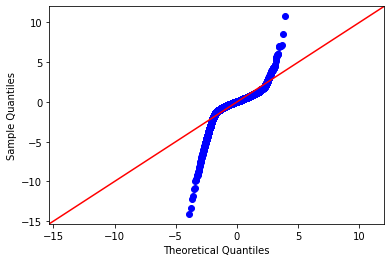

In [67]:
sm.graphics.qqplot(interaction_model.resid, dist=stats.norm, line='45', fit=True)
plt.show()

# Standard Scaling

In [68]:
log_transformed_zips

,sqft_living_log,sqft_above_log,bathrooms_log,bedrooms,floors,view,condition,grade,lat,long,...,zip_98148.0,zip_98155.0,zip_98166.0,zip_98168.0,zip_98177.0,zip_98178.0,zip_98188.0,zip_98198.0,zip_98199.0,zip_98288.0
24120,6.917706,6.917706,0.693147,3.0,1.0,0.0,4.0,6.0,47.548270,-122.360050,...,0,0,0,0,0,0,0,0,0,0
8411,7.170120,6.779922,0.916291,3.0,2.0,0.0,2.0,8.0,47.611760,-122.309000,...,0,0,0,0,0,0,0,0,0,0
20885,7.575585,6.984716,0.693147,3.0,1.0,0.0,3.0,7.0,47.353255,-122.174140,...,0,0,0,0,0,0,0,0,0,0
11917,7.478735,7.162397,0.693147,3.0,1.0,0.0,2.0,8.0,47.731640,-122.221600,...,0,0,0,0,0,0,0,0,0,0
12517,7.897296,7.450080,1.252763,5.0,2.0,3.0,2.0,9.0,47.734060,-122.288075,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22319,7.244228,7.244228,0.405465,3.0,1.0,0.0,3.0,6.0,47.194440,-121.999240,...,0,0,0,0,0,0,0,0,0,0
5554,7.682482,7.272398,0.916291,4.0,1.0,0.0,2.0,8.0,47.726310,-122.233155,...,0,0,0,0,0,0,0,0,0,0
883,7.461640,7.461640,0.916291,3.0,2.0,0.0,3.0,8.0,47.577610,-121.995820,...,0,0,0,0,0,0,0,0,0,0
16321,7.659171,7.319865,1.098612,4.0,1.0,0.0,2.0,8.0,47.270015,-122.309395,...,0,0,0,0,0,0,0,0,0,0


In [71]:
ss = StandardScaler()
log_transformed_zips[['scaled_avg_school_quality', 'scaled_years_old',
                      'scaled_bedrooms', 'scaled_floors', 'scaled_view',
                      'scaled_condition', 'scaled_grade']] = ss.fit_transform(log_transformed_zips[['avg_school_quality', 'years_old',
                                       'bedrooms', 
                                       'floors', 'view',
                                       'condition', 'grade']])

scaled_log_transformed_zips = log_transformed_zips.copy()
scaled_log_transformed_zips.drop(columns = ['avg_school_quality', 'years_old',
                                       'bedrooms', 
                                       'floors', 'view',
                                       'condition', 'grade'], axis = 1, inplace = True)

In [72]:
scaled_model = sm.OLS(log_y, sm.add_constant(scaled_log_transformed_zips)).fit()
scaled_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     551.6
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:11:28   Log-Likelihood:                -5648.6
No. Observations:               21873   AIC:                         1.149e+04
Df Residuals:                   21775   BIC:                         1.228e+04
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               9.8646      0.981     10.059      0.000       7.942      11.787
sqft_living_log                     0.2472      0.014     17.487      0.000       0.219       0.275
sqft_above_log                      0.2355      0.013     18.411      0.000       0.210       0.261
bathrooms_log                       0.0531      0.010      5.539      0.000       0.034       0.072
lat                                 0.6952      0.126      5.534      0.000       0.449       0.942
long                               -0.2328      0.111     -2.097      0.036      -0.450      -0.015
waterfront_YES                      0.2894      0.018     15.832      0.000       0.254       0.325
greenbelt_YES                       0.0583      0.014      4.165      0.000       0.031       0.086
nuisance_YES                       -0.0441      0.006     -7.561      0.000      -0.056      -0.033
renovated_1                         0.0551      0.011      5.052      0.000       0.034       0.076
heat_source_Electricity/Solar      -0.2510      0.053     -4.745      0.000      -0.355      -0.147
heat_source_Gas                     0.0121      0.006      2.077      0.038       0.001       0.024
heat_source_Gas/Solar               0.0668      0.037      1.802      0.071      -0.006       0.139
heat_source_Oil                    -0.0029      0.009     -0.329      0.742      -0.020       0.014
heat_source_Oil/Solar               0.1507      0.157      0.958      0.338      -0.158       0.459
heat_source_Other                   0.1987      0.084      2.354      0.019       0.033       0.364
sewer_system_PRIVATE RESTRICTED    -0.0305      0.158     -0.193      0.847      -0.340       0.279
sewer_system_PUBLIC                -0.0226      0.008     -2.974      0.003      -0.038      -0.008
zip_98001.0                       -61.7821     14.586     -4.236      0.000     -90.372     -33.192
zip_98002.0                       -61.7384     14.529     -4.249      0.000     -90.215     -33.262
zip_98003.0                       -61.7269     14.531     -4.248      0.000     -90.208     -33.246
zip_98004.0                       -60.3429     14.402     -4.190      0.000     -88.571     -32.114
zip_98005.0                       -60.7240     14.415     -4.212      0.000     -88.979     -32.469
zip_98006.0                       -60.7687     14.369     -4.229      0.000     -88.932     -32.605
zip_98007.0                       -61.0819     14.506     -4.211      0.000     -89.515     -32.649
zip_98008.0                       -60.8314     14.401     -4.224      0.000     -89.058     -32.604
zip_98010.0                       -61.2922     14.395     -4.258      0.000     -89.507     -33.078
zip_98011.0                       -61.3239     14.509     -4.227      0.000     -89

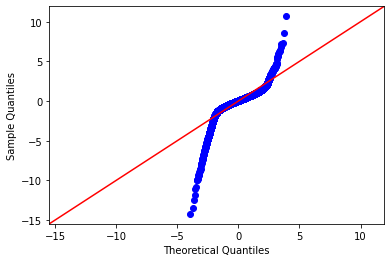

In [73]:
sm.graphics.qqplot(scaled_model.resid, dist=stats.norm, line='45', fit=True)
plt.show()

## Business Question
Considering family homes (2-5 bedrooms) under $1.3 million, how can we maximize school quality and minimize house price?

In [75]:
log_transformed_zips.columns

Index(['sqft_living_log', 'sqft_above_log', 'bathrooms_log', 'bedrooms',
       'floors', 'view', 'condition', 'grade', 'lat', 'long',
       ...
       'zip_98198.0', 'zip_98199.0', 'zip_98288.0',
       'scaled_avg_school_quality', 'scaled_years_old', 'scaled_bedrooms',
       'scaled_floors', 'scaled_view', 'scaled_condition', 'scaled_grade'],
      dtype='object', length=105)